# **Escuela Politecnica Nacional** 
# **Metodos Numericos**
# **Tarea 12**
## **Fecha:** 06/08/2025
## **Nombre:**  Joseph Jimenez

Enlace al repositorio : https://github.com/Josefu-zero/Metodos-Numericos-Tareas/tree/main/Tarea12


## Conjunto de ejercicios

#### **1. Use el método de Euler para aproximar las soluciones para cada uno de los siguientes problemas de valor inicial.**

La siguinte funcion fue proporcidada por el docente

In [42]:
from typing import Callable


# ####################################################################
def ODE_euler(
    *,
    a: float,
    b: float,
    f: Callable[[float, float], float],
    y_t0: float,
    N: int,
) -> tuple[list[float], list[float], float]:
    """Solves (numerically) an ODE of the form
        dy/dt = f(t, y)
            y(t_0) = y_t0, a <= t_0 <= b
    using the Euler method for the N+1 points in the time range [a, b].

    It generates N+1 mesh points with:
        t_i = a + i*h, h = (a - b) / N,
    where h is the step size.


    ## Parameters
    ``a``: initial time
    ``b``: final time
    ``f``: function of two variables ``t`` and ``y``
    ``y_t0``: initial condition
    ``N``: number of mesh points

    ## Return
    ``ys``: a list of the N+1 approximated values of y
    ``ts``: a list of the N+1 mesh points
    ``h``: the step size h

    """
    h = (b - a) / N
    t = a
    ts = [t]
    ys = [y_t0]

    for _ in range(N):
        y = ys[-1]
        y += h * f(t, y)
        ys.append(y)

        t += h
        ts.append(t)
    return ys, ts, h


In [43]:

import math
import numpy as np


def ODE_euler_nth(
    *,
    a: float,
    b: float,
    f: Callable[[float, float], float],
    f_derivatives: list[Callable[[float, float], float]],
    y_t0: float,
    N: int,
) -> tuple[list[float], list[float], float]:
    """Solves (numerically) an ODE of the form
        dy/dt = f(t, y)
            y(t_0) = y_t0, a <= t_0 <= b
    using the Taylor method with (m - 1)th derivatives for the N+1 points in the time range [a, b].

    It generates N+1 mesh points with:
        t_i = a + i*h, h = (a - b) / N,
    where h is the step size.


    ## Parameters
    ``a``: initial time
    ``b``: final time
    ``f``: function of two variables ``t`` and ``y``
    ``f_derivatives``: list of (m - 1)th derivatives of f
    ``y_t0``: initial condition
    ``N``: number of mesh points

    ## Return
    ``ys``: a list of the N+1 approximated values of y
    ``ts``: a list of the N+1 mesh points
    ``h``: the step size h

    """
    h = (b - a) / N
    t = a
    ts = [t]
    ys = [y_t0]

    for _ in range(N):
        y = ys[-1]
        T = f(t, y)
        ders = [
            h / math.factorial(m + 2) * mth_derivative(t, y)
            for m, mth_derivative in enumerate(f_derivatives)
        ]
        T += sum(ders)
        y += h * T
        ys.append(y)

        t += h
        ts.append(t)
    return ys, ts, h


In [44]:

import matplotlib.pyplot as plt

def graficadora(ts, ys):
    plt.plot(ts, ys, marker = "o", linestyle = "-", label = "y'")
    plt.xlabel("t")
    plt.ylabel("y")
    plt.title("Solución de la EDO")
    plt.legend()
    plt.show()



a) $y' = te^{3t} - 2y$, $0 \le t \le 1$, $y(0) = 0$, con $h = 0.5$


El valor de h es: 0.5


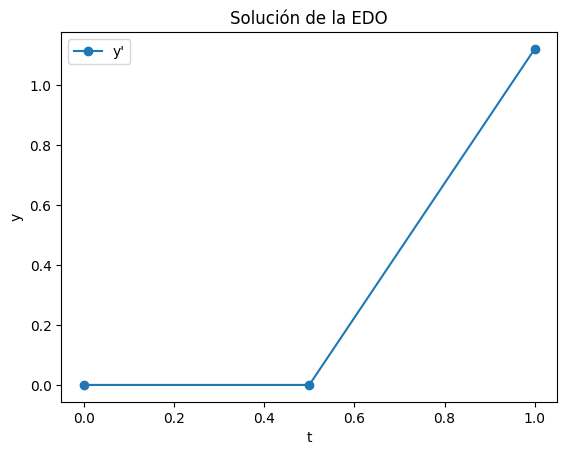

In [45]:

y_der = lambda t, y: t*math.exp(3*t) - 2*y
y_init = 0

ys1a, ts1a, h = ODE_euler(a = 0, b = 1, f = y_der, y_t0 = y_init, N = 2)

print(f"El valor de h es: {h}")
graficadora(ts1a, ys1a)


b) $y' = 1 + (t - y)^2$, $2 \le t \le 3$, $y(2) = 1$, con $h = 0.5$

El valor de h es: 0.5


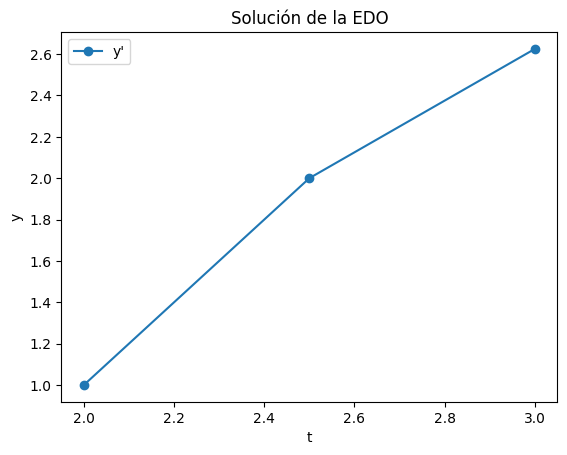

In [46]:

y_der = lambda t, y: 1 + (t - y)**2
y_init = 1

ys1b, ts1b, h = ODE_euler(a = 2, b = 3, f = y_der, y_t0 = y_init, N = 2)

print(f"El valor de h es: {h}")
graficadora(ts1b, ys1b)


c) $y' = 1 + \frac{y}{t}$, $1 \le t \le 2$, $y(1) = 2$, con $h = 0.25$


El valor de h es: 0.25


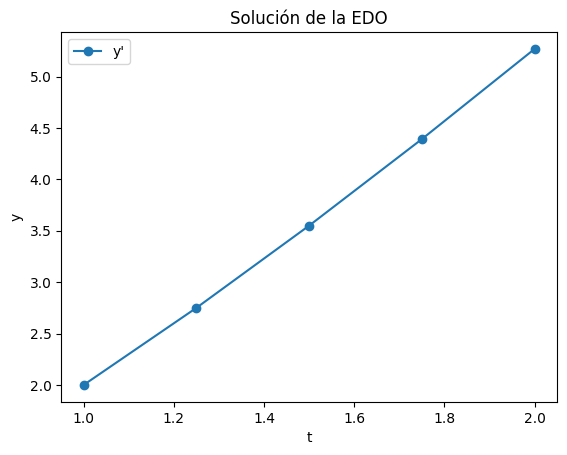

In [47]:

y_der = lambda t, y: 1 + y/t
y_init = 2

ys1c, ts1c, h = ODE_euler(a = 1, b = 2, f = y_der, y_t0 = y_init, N = 4)

print(f"El valor de h es: {h}")
graficadora(ts1c, ys1c)


d) $y' = \cos{2t} + \sin{3t}$, $0 \le t \le 1$, $y(0) = 1$, con $h = 0.25$

El valor de h es: 0.25


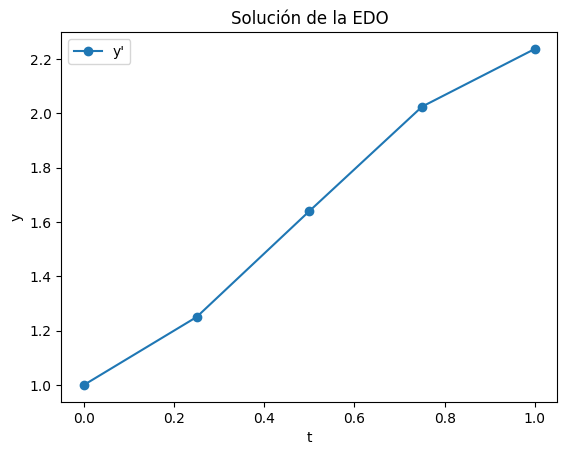

In [48]:

y_der = lambda t, y: math.cos(2*t) + math.sin(3*t)
y_init = 1

ys1d, ts1d, h = ODE_euler(a = 0, b = 1, f = y_der, y_t0 = y_init, N = 4)

print(f"El valor de h es: {h}")
graficadora(ts1d, ys1d)


#### **2. Las soluciones reales para los problemas de valor inicial en el ejercicio 1 se proporcionan aquí. Compare el error real en cada paso.**

a) $y(t) = \frac{1}{5} te^{3t} - \frac{1}{25} te^{3t} + \frac{1}{25} te^{-2t}$


In [49]:

def y(t):
    return 1/5*t*math.exp(3*t) - 1/25*t*math.exp(3*t) + 1/25*t*math.exp(-2*t)

errorReal = np.mean([abs(y(t) - y_aprox) / abs(y(t)) for y_aprox, t in zip(ys1a, ts1a)])
print(f"El error real es: {errorReal}")


ZeroDivisionError: float division by zero

b) $y(t) = t + \frac{1}{1 - t}$


In [50]:

def y(t):
    return t + 1/(1 - t)

errorReal = np.mean([abs(y(t) - y_aprox) / abs(y(t)) for y_aprox, t in zip(ys1b, ts1b)])
print(f"El error real es: {errorReal}")


El error real es: 0.04696969696969694


c) $y(t) = t \ln{t} + 2t$

In [51]:

def y(t):
    return t * math.log(t) + 2*t

errorReal = np.mean([abs(y(t) - y_aprox) / abs(y(t)) for y_aprox, t in zip(ys1c, ts1c)])
print(f"El error real es: {errorReal}")


El error real es: 0.013575458924045315


d) $y(t) = \frac{1}{2} \sin{2t} - \frac{1}{3} \cos{3t} + \frac{4}{3}$


In [52]:

def y(t):
    return 1/2*math.sin(2*t) - 1/3*math.cos(3*t) + 4/3

errorReal = np.mean([abs(y(t) - y_aprox) / abs(y(t)) for y_aprox, t in zip(ys1d, ts1d)])
print(f"El error real es: {errorReal}")


El error real es: 0.035265188624637164


#### **3. Utilice el método de Euler para aproximar las soluciones para cada uno de los siguientes problemas de valor inicial.**


a) $y' = \frac{y}{t} - (\frac{y}{t})^2$, $1 \le t \le 2$, $y(1) = 1$, con $h = 0.1$.


El valor de h es: 0.1


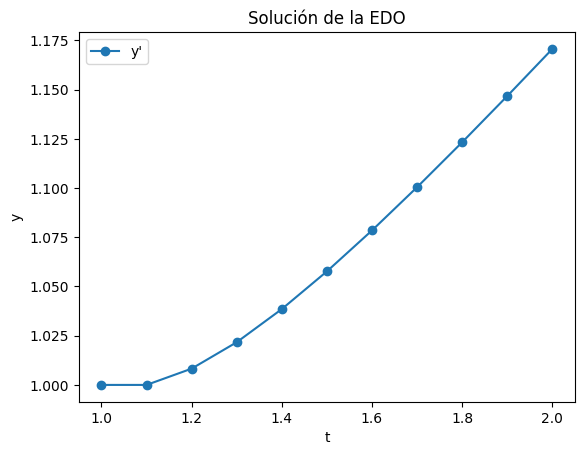

In [53]:

y_der = lambda t, y: y/t - (y/t)**2
y_init = 1

ys2a, ts2a, h = ODE_euler(a = 1, b = 2, f = y_der, y_t0 = y_init, N = 10)

print(f"El valor de h es: {h}")
graficadora(ts2a, ys2a)



b) $y' = 1 + \frac{y}{t} + (\frac{y}{t})^2$, $1 \le t \le 3$, $y(1) = 0$, con $h = 0.2$.


El valor de h es: 0.2


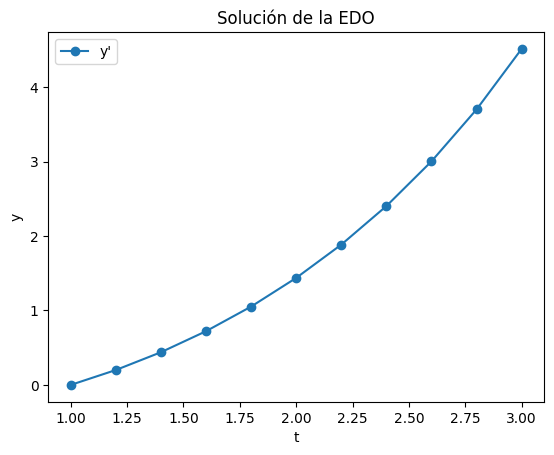

In [54]:

y_der = lambda t, y: 1 + y/t + (y/t)**2
y_init = 0

ys2b, ts2b, h = ODE_euler(a = 1, b = 3, f = y_der, y_t0 = y_init, N = 10)

print(f"El valor de h es: {h}")
graficadora(ts2b, ys2b)



c) $y' = -(y + 1)(y + 3)$, $0 \le t \le 2$, $y(0) = -2$, con $h = 0.2$.


El valor de h es: 0.2


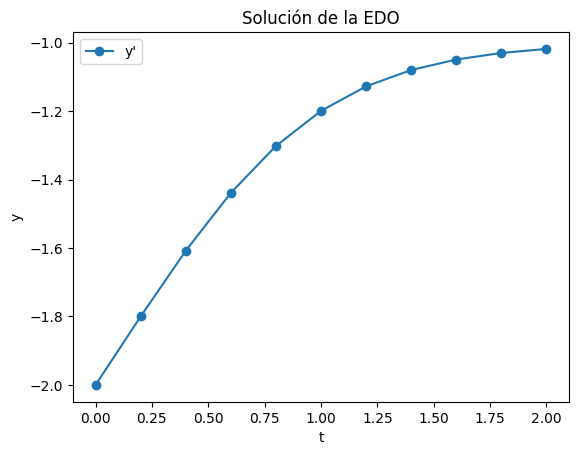

In [55]:

y_der = lambda t, y: -(y + 1)*(y + 3)
y_init = -2

ys2c, ts2c, h = ODE_euler(a = 0, b = 2, f = y_der, y_t0 = y_init, N = 10)

print(f"El valor de h es: {h}")
graficadora(ts2c, ys2c)



d) $y' = -5y + 5t^2 + 2t$, $0 \le t \le 1$, $y(0) = \frac{1}{3}$, con $h = 0.1$.


El valor de h es: 0.1


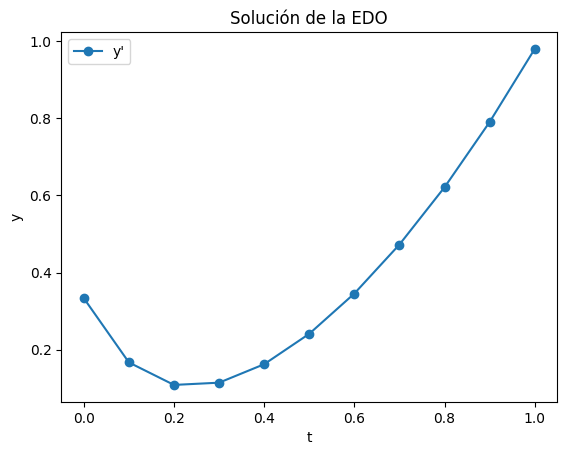

In [56]:

y_der = lambda t, y: -5*y + 5*t**2 + 2*t
y_init = 1/3

ys2d, ts2d, h = ODE_euler(a = 0, b = 1, f = y_der, y_t0 = y_init, N = 10)

print(f"El valor de h es: {h}")
graficadora(ts2d, ys2d)


#### **4. Aquí se dan las soluciones reales para los problemas de valor inicial en el ejercicio 3. Calcule el error real en las aproximaciones del ejercicio 3.**


a) $y(t) = \frac{t}{1 + \ln{t}}$


In [57]:

def y1(t):
    return t/(1 + math.log(t))

errorReal = np.mean([abs(y(t) - y_aprox) / abs(y(t)) for y_aprox, t in zip(ys2a, ts2a)])
print(f"El error real es: {errorReal}")


El error real es: 0.4026114748989524



b) $y(t) = t \tan{\ln{t}}$


In [58]:

def y2(t):
    return t*math.tan(math.log(t))

errorReal = np.mean([abs(y(t) - y_aprox) / abs(y(t)) for y_aprox, t in zip(ys2b, ts2b)])
print(f"El error real es: {errorReal}")



El error real es: 1.4857714189452615



c) $y(t) = - 3 + \frac{2}{1 + e^{-2t}}$


In [59]:

def y3(t):
    return - 3 + 2/(1 + math.exp(-2*t))

errorReal = np.mean([abs(y(t) - y_aprox) / abs(y(t)) for y_aprox, t in zip(ys2c, ts2c)])
print(f"El error real es: {errorReal}")


El error real es: 2.0191941754493365



d) $y(t) = t^2 + \frac{1}{3} e^{-5t}$


In [60]:

def y4(t):
    return t**2 + (1/3)*math.exp(-5*t)

errorReal = np.mean([abs(y(t) - y_aprox) / abs(y(t)) for y_aprox, t in zip(ys2d, ts2d)])
print(f"El error real es: {errorReal}")


El error real es: 0.7773952281750381


#### **5. Utilice los resultados del ejercicio 3 y la interpolación lineal para aproximar los siguientes valores de 𝑦(𝑡). Compare las aproximaciones asignadas para los valores reales obtenidos mediante las funciones determinadas en el ejercicio 4.**


a) $y(0.25)$ y $y(0.93)$.


In [61]:

res = y1(0.25)
print(res)

res = y1(0.93)
print(res)


-0.6471748623905226
1.0027718477462106



b) $y(1.25)$ y $y(1.93)$.


In [62]:

res = y2(1.25)
print(res)

res = y2(1.93)
print(res)


0.2836531261952289
1.4902277738186658


c) $y(2.10)$ y $y(2.75)$.


In [63]:

res = y3(2.1)
print(res)

res = y3(2.75)
print(res)


-1.0295480633865461
-1.008140275431792



d) $y(0.54)$ y $y(0.94)$.


In [64]:

res = y4(0.54)
print(res)

res = y4(0.94)
print(res)


0.3140018375799166
0.8866317590338986


#### **6. Use el método de Taylor de orden 2 para aproximar las soluciones para cada uno de los siguientes problemas de valor inicial.**


a) $y' = te^{3t} - 2y$, $0 \le t \le 1$, $y(0) = 0$, con $h = 0.5$


El valor de h es: 0.5


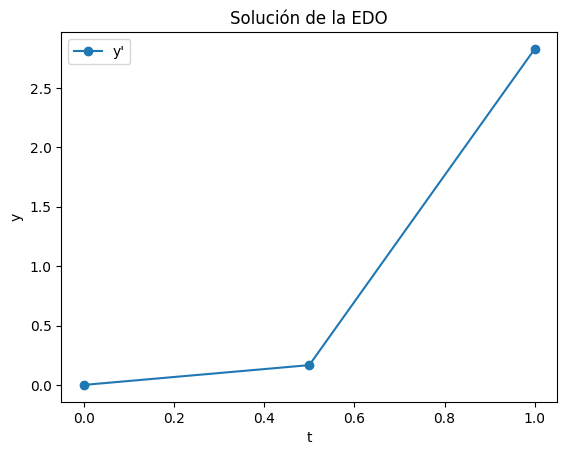

In [65]:

y_der = lambda t, y: t*math.exp(3*t) - 2*y
y_der_2 = lambda t, y: -2*y_der(t, y) + math.exp(3*t) + 3*t*math.exp(3*t)
y_der_3 = lambda t, y: -2*y_der_2(t, y) + 3 * math.exp(3*t) + 9*t*math.exp(3*t)
y_init = 0

ys, ts, h = ODE_euler_nth(a = 0, b = 1, f = y_der,
                          f_derivatives = [y_der_2, y_der_3],
                          y_t0 = y_init, N = 2)

print(f"El valor de h es: {h}")
graficadora(ts, ys)



b) $y' = 1 + (t - y)^2$, $2 \le t \le 3$, $y(2) = 1$, con $h = 0.5$


El valor de h es: 0.5


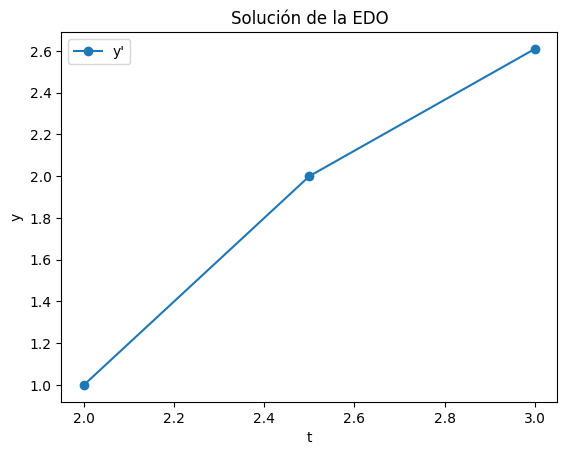

In [66]:

y_der = lambda t, y: 1 + (t - y)**2
y_der_2 = lambda t, y: 2*(t - y)*(1 - y_der(t,y))
y_der_3 = lambda t, y: 2*(1 - y_der(t, y))**2 - 2*(t - y)*y_der_2(t,y)
y_init = 1

ys, ts, h = ODE_euler_nth(a = 2, b = 3, f = y_der,
                          f_derivatives = [y_der_2, y_der_3],
                          y_t0 = y_init, N = 2)

print(f"El valor de h es: {h}")
graficadora(ts, ys)



c) $y' = 1 + \frac{y}{t}$, $1 \le t \le 2$, $y(1) = 2$, con $h = 0.25$


El valor de h es: 0.25


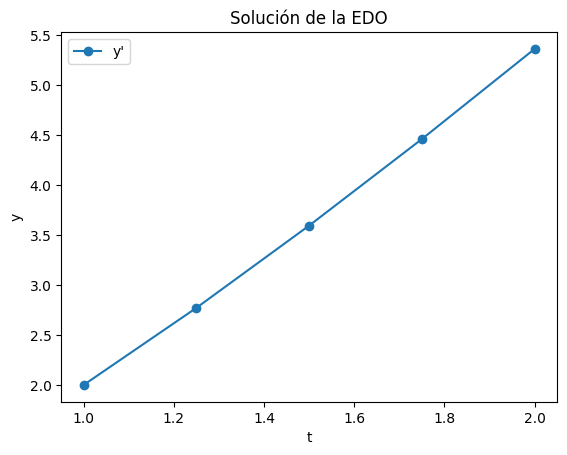

In [67]:

y_der = lambda t, y: 1 + y/t
y_der_2 = lambda t, y: (t * y_der(t, y) - y)/t**2
y_der_3 = lambda t, y: -1/t**2
y_init = 2

ys, ts, h = ODE_euler_nth(a = 1, b = 2, f = y_der,
                          f_derivatives = [y_der_2, y_der_3],
                          y_t0 = y_init, N = 4)

print(f"El valor de h es: {h}")
graficadora(ts, ys)


d) $y' = \cos{2t} + \sin{3t}$, $0 \le t \le 1$, $y(0) = 1$, con $h = 0.25$


El valor de h es: 0.25


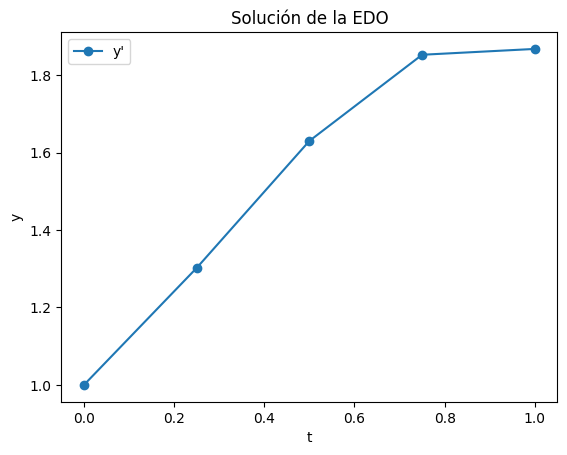

In [68]:

y_der = lambda t, y: math.cos(2*t) + math.sin(3*t)
y_der_2 = lambda t, y: -2*math.sin(2*t) + 3*math.cos(3*t)
y_der_3 = lambda t, y: -4*math.cos(2*t) - 9*math.sin(3*t)
y_init = 1

ys, ts, h = ODE_euler_nth(a = 0, b = 1, f = y_der,
                          f_derivatives = [y_der_2, y_der_3],
                          y_t0 = y_init, N = 4)

print(f"El valor de h es: {h}")
graficadora(ts, ys)


#### **7. Repita el ejercicio 6 con el método de Taylor de orden 4**


a) $y' = te^{3t} - 2y$, $0 \le t \le 1$, $y(0) = 0$, con $h = 0.5$


El valor de h es: 0.5


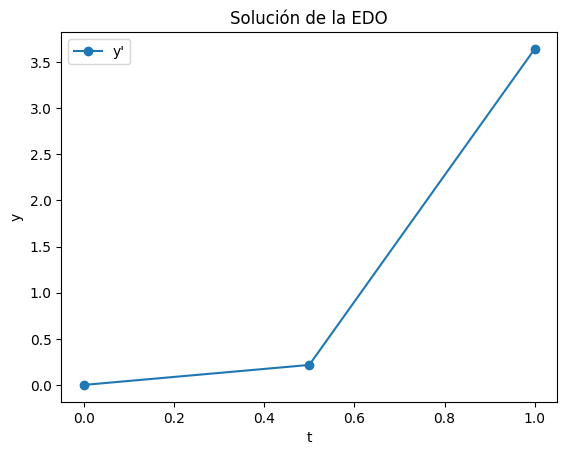

In [69]:

y_der = lambda t, y: t*math.exp(3*t) - 2*y
y_der_2 = lambda t, y: -2*y_der(t, y) + math.exp(3*t) + 3*t*math.exp(3*t)
y_der_3 = lambda t, y: -2*y_der_2(t, y) + 3*math.exp(3*t) + 9*t*math.exp(3*t)
y_der_4 = lambda t, y: -2*y_der_3(t, y) + 6*math.exp(3 * t) + 27*t*math.exp(3*t)
y_der_5 = lambda t, y: -2*y_der_4(t, y) + 12*math.exp(3 * t) + 81*t*math.exp(3*t)
y_init = 0

ys, ts, h = ODE_euler_nth(a = 0, b = 1, f = y_der,
                          f_derivatives = [y_der_2, y_der_3, y_der_4, y_der_5],
                          y_t0 = y_init, N = 2)

print(f"El valor de h es: {h}")
graficadora(ts, ys)


b) $y' = 1 + (t - y)^2$, $2 \le t \le 3$, $y(2) = 1$, con $h = 0.5$

El valor de h es: 0.5


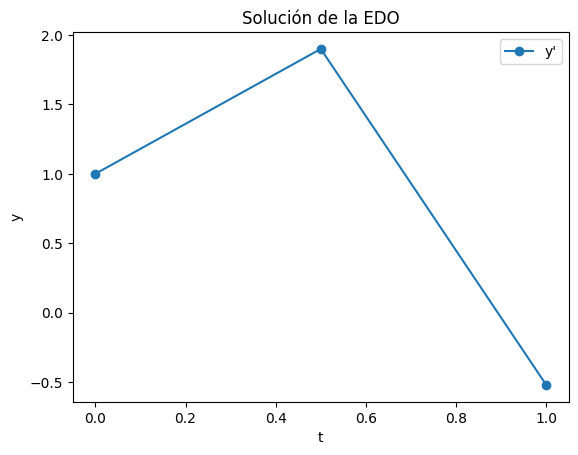

In [70]:

y_der = lambda t, y: 1 + (t - y)**2
y_der_2 = lambda t, y: 2*(t - y)*(1 - y_der(t, y))
y_der_3 = lambda t, y: 2*(1 - y_der_2(t, y))**2 - 2*(t - y)*y_der_2(t, y)
y_der_4 = lambda t, y: -4*(t - y)*(1 - y_der(t, y))*y_der_2(t, y) - 4*(1 - y_der(t, y))*(1 - y_der(t, y)) + 2*(t - y)*(y_der_3(t, y) - 2*(1 - y_der(t, y))*y_der_2(t, y))
y_der_5 = lambda t, y: -4*(1 - y_der(t, y))*(y_der_4(t, y) + (t - y)*(y_der_2(t, y) - y_der_3(t, y))) - 8*(t - y)*(1 - y_der(t, y))*y_der_2(t, y)
y_init = 1

ys, ts, h = ODE_euler_nth(a = 0, b = 1, f = y_der,
                          f_derivatives = [y_der_2, y_der_3, y_der_4, y_der_5],
                          y_t0 = y_init, N = 2)

print(f"El valor de h es: {h}")
graficadora(ts, ys)


c) $y' = 1 + \frac{y}{t}$, $1 \le t \le 2$, $y(1) = 2$, con $h = 0.25$


El valor de h es: 0.25


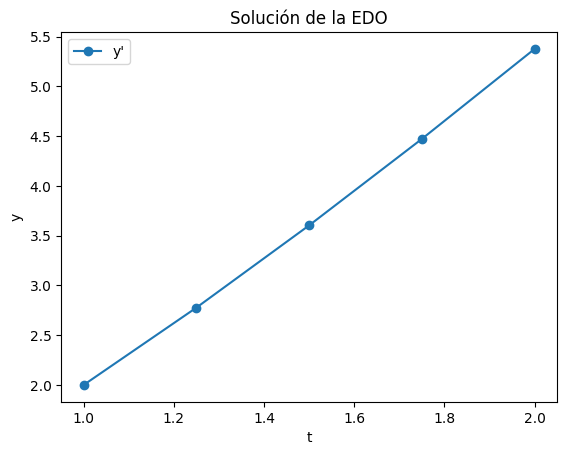

In [71]:

y_der = lambda t, y: 1 + y/t
y_der_2 = lambda t, y: (t*y_der(t, y) - y)/t**2
y_der_3 = lambda t, y: -1/t**2
y_der_4 = lambda t, y: (2*y - t*(2 + y/t))/t**3
y_der_5 = lambda t, y: (6*(t*(2 + y/t) - y) - 6*(2*y - t*(2 + y/t)))/t**4
y_init = 2

ys, ts, h = ODE_euler_nth(a = 1, b = 2, f = y_der,
                          f_derivatives = [y_der_2, y_der_3, y_der_4, y_der_5],
                          y_t0 = y_init, N = 4)

print(f"El valor de h es: {h}")
graficadora(ts, ys)


d) $y' = \cos{2t} + \sin{3t}$, $0 \le t \le 1$, $y(0) = 1$, con $h = 0.25$


El valor de h es: 0.25


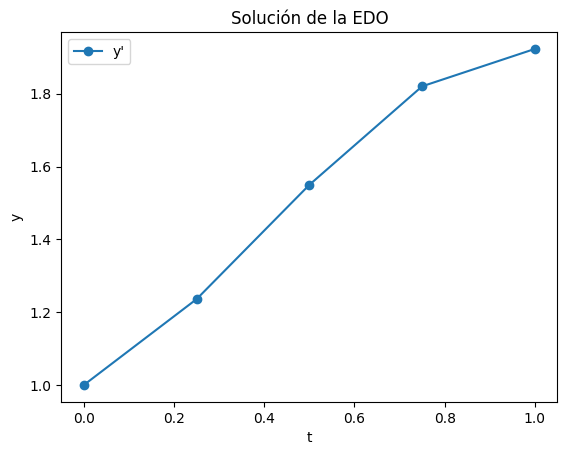

In [72]:

y_der = lambda t, y: math.cos(2*t) + math.sin(3*t)
y_der_2 = lambda t, y: -2*math.sin(2*t) + 3*math.cos(3*t)
y_der_3 = lambda t, y: -4*math.cos(2*t) - 9*math.sin(3*t)
y_der_4 = lambda t, y: 4*math.sin(2*t) - 27*math.cos(3*t)
y_der_5 = lambda t, y: 8*math.cos(2*t) + 81 *math.sin(3*t)
y_init = 1

ys, ts, h = ODE_euler_nth(a = 0, b = 1, f = y_der,
                          f_derivatives = [y_der_2, y_der_3, y_der_4, y_der_5],
                          y_t0 = y_init, N = 4)

print(f"El valor de h es: {h}")
graficadora(ts, ys)
